In [1]:
# importing raw packages that are used in the analysis
import csv
import matplotlib.pyplot as pyplot
import seaborn as sns
from collections import Counter
import pandas as pd
from operator import itemgetter
from matplotlib.collections import BrokenBarHCollection

In [2]:
i = 1
allgenes = []
errorgenes = []
with open("../Data File(s): Genes and Regulation/gene.txt") as f: #Open the raw file that stores all gene info, read
    f2 = csv.reader(f, delimiter = "\t")
    for line in f2:
        if len(line) > 1: #remove empty lines
            if len(line[1]) == 0: #If the gene name is unknown just assign a name of the form Unknown+ a number
                line[0] = "Unknown" + str(i)
                i = i+1
            try: #if the information is present in the data file, try to calculate the start point and length of gene
                start = int(line[2]) 
                length = int(line[3])-start
                allgenes.append((line[1], start, length))
            except:
                errorgenes.append(line[1]) #Put genes which could not be mapped to a position here

reggenes = []
with open("../Data File(s): Genes and Regulation/generegulation_tmp.txt") as g: #read the file with regulatory info
    g2 = csv.reader(g, delimiter = "\t")
    for gene in g2:
        if len(gene) > 1: #if the line is not empty, append the gene to the list of regulated genes
            reggenes.append(gene[7])

reggenes2 = list(set(reggenes))
print(len(reggenes2)) #number of regulated genes
print(len(allgenes)) #total genes

            
        

1781
4647


In [4]:
#These genes we don't have loci for, and checks whether any of those genes are regulated. They are consequently
#not plotted. Since nothing prints, none of our regulated genes are missing positional information
for genes in errorgenes:
    if genes in reggenes2:
        print("Error in: " + genes)

In [5]:
cis = []
noreg = []
name = []
notsame = []
for gene in allgenes:
    if gene[0] in reggenes2: #making sure all the regulated genes have positional information, once again
        cis.append((gene[1],gene[2]))
        name.append(gene[0])
    else:
        noreg.append((gene[1],gene[2]))
        notsame.append(gene[0])
print(len(cis)) #we see that the number of regulated genes is the same as the number of genes we have positional
                #information about. We can move on.
print(len(noreg))
print(list(set(reggenes2)-set(name)))
#There was nothing that was not a genename in the list of regulated genes
print(len(name))
print(len(notsame))

1781
2866
[]
1781
2866


In [6]:
#Just changing the list into pandas dataframes
reggenes_ecoli = pd.DataFrame(name)
nonreggenes_ecoli = pd.DataFrame(notsame)

In [ ]:
#optional save genes to csv
reggenes_ecoli.to_csv("ecoli_reggenes.csv", header = False, index = False)
nonreggenes_ecoli.to_csv("ecoli_nonreggenes.csv", header = False, index = False)

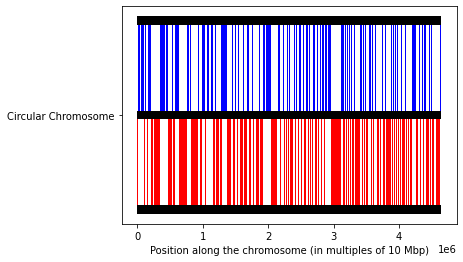

In [8]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
        
#Define the edges and staring/ending points of the chromosomes along with their sizes
#The yranges set the range of y in the form of [start, length] just like the x
yticklabels = []
yticks = []
yranges = [[20,5]]
yranges2 = [[25.5,5]]
beginner = (-5000,5000)
edge = [(4639221,2500)]
lengths = [(0,4639221)]
bottoms = [19.5, 19.5]
bottoms2 = [25,25]
tops = [25, 25]
tops2 = [30.5, 30.5]

#Plot the data. BrokenbarHcollection (matplotlib) takes inputs in the form of [(start,length), (start, length)...] for
#both x and y. Blue are genes with regulation, red are genes with no regulation. The code works by basically drawing
#a ton of rectangles. This chunk plots the genes.
for i in range(0,1):
    #this creates the genes
    coll = BrokenBarHCollection(cis, yranges2[i], facecolor="blue", zorder= 1)
    #this part adds the rectangles created to the graph
    ax.add_collection(coll)
for i in range(0,1):
    #this creates the genes
    coll = BrokenBarHCollection(noreg, yranges[i], facecolor="red", zorder = 0.75)
    #this part adds the rectangles created to the graph
    ax.add_collection(coll)
    
widthbox = 0.5
heightbox = 6

#This chunk plots the edges and ends of the chromosome, essentially everything in black
for i in range(0,1):
    #this creates the rectangles
    col2 = BrokenBarHCollection([lengths[i]], [bottoms[i],widthbox], facecolor="black")
    col3 = BrokenBarHCollection([lengths[i]], [tops[i],widthbox], facecolor="black")
    col4 = BrokenBarHCollection([beginner,edge[i]], [bottoms[i],heightbox], facecolor="black")
    col5 = BrokenBarHCollection([lengths[i]], [bottoms2[i],widthbox], facecolor="black")
    col6 = BrokenBarHCollection([lengths[i]], [tops2[i],widthbox], facecolor="black")
    col7 = BrokenBarHCollection([beginner,edge[i]], [bottoms2[i],heightbox], facecolor="black")
    center = bottoms[i]+5.75
    yticks.append(center)
    #this part adds the rectangles created to the graph
    ax.add_collection(col2)
    ax.add_collection(col3)
    ax.add_collection(col4)
    ax.add_collection(col5)
    ax.add_collection(col6)
    ax.add_collection(col7)

#Sets the labels
labeler = ["Circular Chromosome"]
for a in labeler:
    yticklabels.append(a)

#basically plots and sets some final parameters to improve viewability
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.axis('tight')
pyplot.xlabel("Position along the chromosome (in multiples of 10 Mbp)")
pyplot.savefig('../Ecoli.pdf') #saves a pdf copy
pyplot.show()